# Chapter 5: Spatial Image Enhancement by Filtering: Convolution

This is the companion file for Chapter 5.

## **Programming exercise 5.1:**

1.   Run the following code to see different ways of padding.

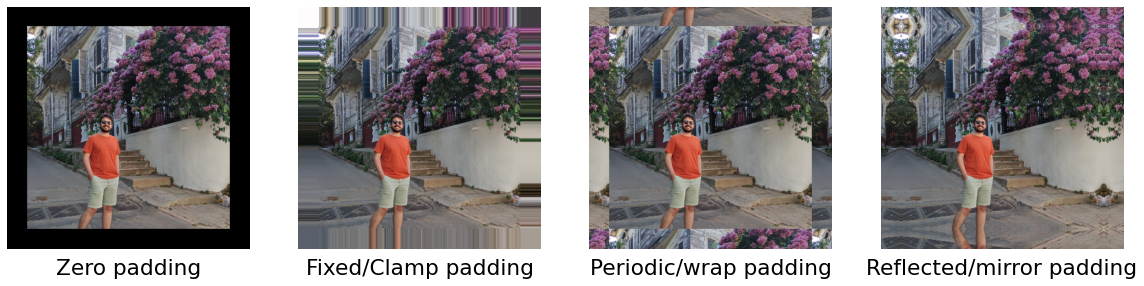

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
import urllib.request
from skimage import io

original_img = io.imread("robin_padding_input.png")
shape = original_img.shape

#show image with matplotlib
plt.figure(figsize=(20,5))
#plt.rcParams.update({'font.size': 18})

zero_padded = np.pad(original_img, ((shape[1]//10,shape[1]//10), (shape[0]//10,shape[0]//10), (0,0)), 'constant', constant_values=(0))

plt.subplot(1,4,1)
plt.imshow(zero_padded)
plt.title('Zero padding', y = -0.13)
plt.axis('off')

continuous_padded = np.pad(original_img, ((shape[1]//10,shape[1]//10), (shape[0]//10,shape[0]//10), (0,0)), 'edge')

plt.subplot(1,4,2)
plt.imshow(continuous_padded)
plt.title('Fixed/Clamp padding', y = -0.13)
plt.axis('off')

periodic_padded = np.pad(original_img, ((shape[1]//10,shape[1]//10), (shape[0]//10,shape[0]//10), (0,0)), 'wrap')

plt.subplot(1,4,3)
plt.imshow(periodic_padded)
plt.title('Periodic/wrap padding', y = -0.13)
plt.axis('off')

reflect_padded = np.pad(original_img, ((shape[1]//10,shape[1]//10), (shape[0]//10,shape[0]//10), (0,0)), 'reflect')

plt.subplot(1,4,4)
plt.imshow(reflect_padded)
plt.title('Reflected/mirror padding', y = -0.13)
plt.axis('off')

plt.show()
 

## Video 5.1. 1D Convolution of two functions $f(t)$ and $g(t - \tau)$. 

![Alt text](https://upload.wikimedia.org/wikipedia/commons/b/b9/Convolution_of_spiky_function_with_box2.gif)

## Video 5.2. 2D Convolution of two matrices.

![Alt text](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

## **Programming exercise 5.2:**

1.   Run the following code to see the output of average filtering.
2.   Change the kernel size to (20, 20) and apply the filter on the checkerboard image.

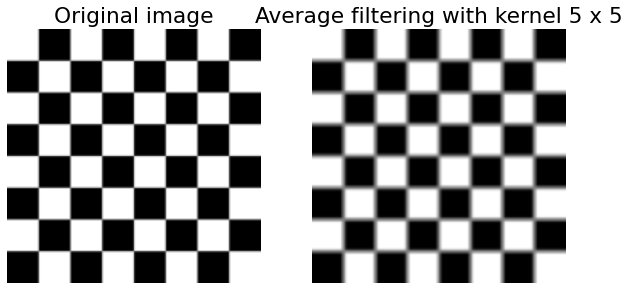

In [44]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage


img = data.checkerboard().astype(float)

kernel1 = np.ones((5,5))
img_kernel1 = scipy.ndimage.convolve(img, kernel1) 

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray);
ax[0].set_title('Original image');
ax[0].axis('off');

ax[1].imshow(img_kernel1, cmap=plt.cm.gray);
ax[1].set_title('Average filtering with kernel 5 x 5');
ax[1].axis('off');

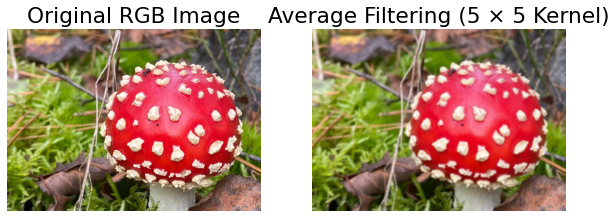

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load your own image 
image_path = 'redmushroom_long.png'
img = cv2.imread(image_path)  # Load image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Define generic averaging kernel size
kernel_size = 5  # Change this to any size (e.g., 3, 7, etc.)
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)  # Normalize

# Apply average filter separately to each channel
img_filtered = np.zeros_like(img)

for i in range(3):  # Loop over R, G, B channels
    img_filtered[:, :, i] = convolve(img[:, :, i], kernel)

# Display results
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original RGB Image')
ax[0].axis('off')

ax[1].imshow(img_filtered)
ax[1].set_title(f'Average Filtering ({kernel_size} × {kernel_size} Kernel)')
ax[1].axis('off')

plt.show()


## **Programming exercise 5.3:**

1.   Run the following code to see the output of Gaussian filtering.
2.   Change sigma to 10 and apply the filter on the checkerboard image.

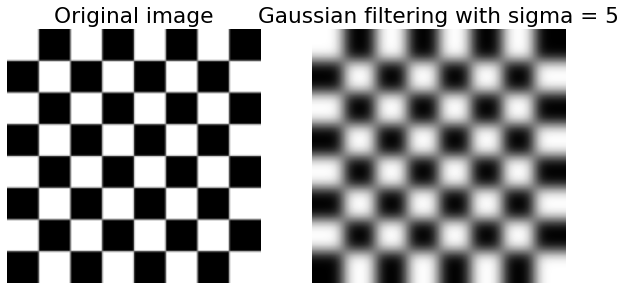

In [46]:
# Gaussian filtering

from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.filters

img = data.checkerboard().astype(float)

img_filter1 = scipy.ndimage.gaussian_filter(img, sigma=5)
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray);
ax[0].set_title('Original image');
ax[0].axis('off');

ax[1].imshow(img_filter1, cmap=plt.cm.gray);
ax[1].set_title('Gaussian filtering with sigma = 5');
ax[1].axis('off');


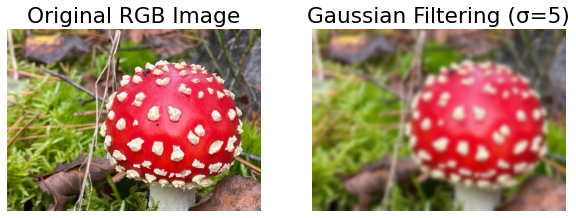

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load your own image 
image_path = 'redmushroom_long.png'
img = cv2.imread(image_path)  # Load image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Apply Gaussian filter separately to each channel
sigma = 5  # Standard deviation for Gaussian filter
img_filtered = np.zeros_like(img)

for i in range(3):  # Loop over R, G, B channels
    img_filtered[:, :, i] = gaussian_filter(img[:, :, i], sigma=sigma)

# Display results
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original RGB Image')
ax[0].axis('off')

ax[1].imshow(img_filtered)
ax[1].set_title(f'Gaussian Filtering (σ={sigma})')
ax[1].axis('off')

plt.show()


## **Programming exercise 5.4:**

1.   Run the following code to see the output of median filtering.
2.   Change the amount of noise to 0.5 and visualize the output.
3.   Change the kernel size to (20,20) and apply the median filter.

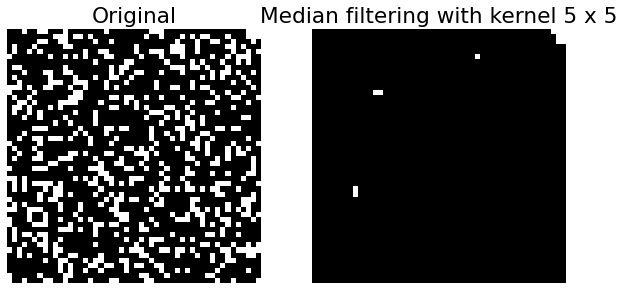

In [48]:
# Median filtering
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import median 
from skimage.morphology import square
from skimage.util import random_noise

img = np.zeros([50,50],dtype=np.uint8)
noisy_img = random_noise(img, seed=2, mode='salt', amount=0.25)

kernel1 = np.ones((5,5))

img_kernel1 = median(noisy_img, kernel1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(noisy_img, cmap=plt.cm.gray);
ax[0].set_title('Original');
ax[0].axis('off');

ax[1].imshow(img_kernel1, cmap=plt.cm.gray);
ax[1].set_title('Median filtering with kernel 5 x 5');
ax[1].axis('off');


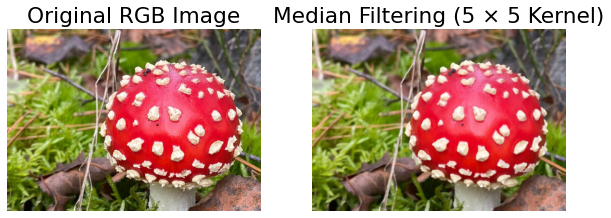

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.morphology import square

# Load your own image (Replace 'your_image.png' with the actual file path)
image_path = 'redmushroom_long.png'
img = cv2.imread(image_path)  # Load image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Define kernel size for median filtering
kernel_size = 5  # Change this to 3, 7, etc.
selem = square(kernel_size)  # Structuring element for filtering

# Apply median filter separately to each channel
img_filtered = np.zeros_like(img)

for i in range(3):  # Loop over R, G, B channels
    img_filtered[:, :, i] = median(img[:, :, i], selem)

# Display results
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original RGB Image')
ax[0].axis('off')

ax[1].imshow(img_filtered)
ax[1].set_title(f'Median Filtering ({kernel_size} × {kernel_size} Kernel)')
ax[1].axis('off')

plt.show()


## **Programming exercise 5.5:**

1.   Run the following code to see the outputs of different edge detectors.


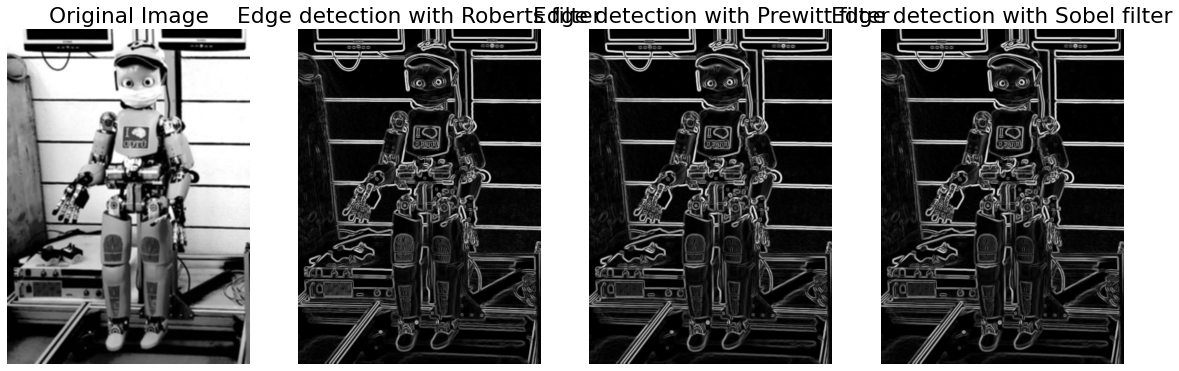

In [50]:
# Edge detection using Roberts, Prewitt, and Sobel filters
from skimage import data
from skimage import filters
img = data.camera()

from skimage import io
!wget -cq https://raw.githubusercontent.com/hazalmogultay/466Images/master/W5/robot.png
img = io.imread('robot.png')

roberts_img = filters.roberts(img)
prewitt_img = filters.prewitt(img)
sobel_img = filters.sobel(img)

fig, axes = plt.subplots(ncols=4, figsize=(20, 8))
ax = axes.ravel()


ax[0].imshow(img, cmap=plt.cm.gray);
ax[0].set_title('Original Image');
ax[0].axis('off');

ax[1].imshow(roberts_img, cmap=plt.cm.gray);
ax[1].set_title('Edge detection with Roberts filter');
ax[1].axis('off');

ax[2].imshow(prewitt_img, cmap=plt.cm.gray);
ax[2].set_title('Edge detection with Prewitt filter');
ax[2].axis('off');

ax[3].imshow(sobel_img, cmap=plt.cm.gray);
ax[3].set_title('Edge detection with Sobel filter');
ax[3].axis('off');


## **Programming exercise 5.6:**

1.   Run the following code to see the output of Laplacian filter.

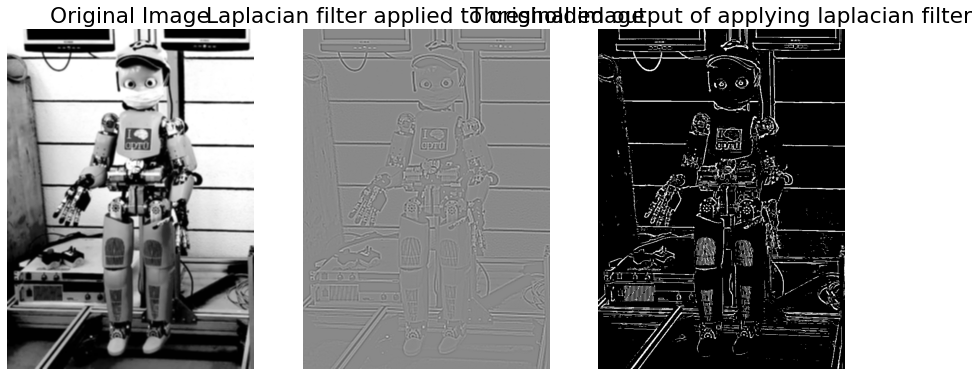

In [51]:
# Edge detection using Laplacian filter
from skimage import data
from skimage import filters
from skimage.filters import threshold_otsu
laplace_img = filters.laplace(img)
thresh = threshold_otsu(laplace_img)
binary = laplace_img < thresh

fig, axes = plt.subplots(ncols=3, figsize=(15, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(laplace_img, cmap=plt.cm.gray);
ax[1].set_title('Laplacian filter applied to original image');
ax[1].axis('off');

ax[2].imshow(binary, cmap=plt.cm.gray);
ax[2].set_title('Thresholded output of applying laplacian filter');
ax[2].axis('off');

## **Programming exercise 5.7:**

1.   Run the following code to see and compare the outputs of Marr-Hildreth Edge Detection and Canny Edge Detection.

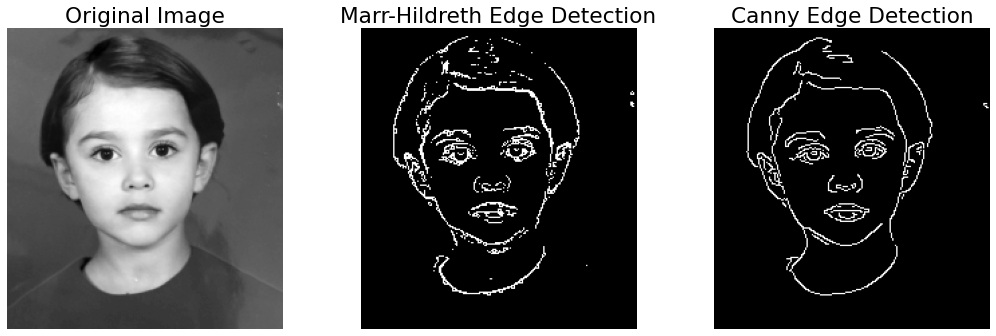

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the image in grayscale
image_path = 'child_edge.png'  # Replace with your image file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# ====================
# Marr-Hildreth Edge Detection
# ====================

# Step 1: Convolve the image with the Laplacian of Gaussian filter
sigma = 1.0  # Standard deviation for Gaussian filter
gaussian_blurred = gaussian_filter(image, sigma=sigma)

# Apply Laplacian to the Gaussian-blurred image
laplacian = cv2.Laplacian(gaussian_blurred, cv2.CV_64F)

# Step 2: Find zero crossings (locations where Laplacian changes sign)
zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
for i in range(1, laplacian.shape[0] - 1):
    for j in range(1, laplacian.shape[1] - 1):
        if laplacian[i, j] == 0:
            continue
        neighbors = [
            laplacian[i - 1, j - 1], laplacian[i - 1, j], laplacian[i - 1, j + 1],
            laplacian[i, j - 1], laplacian[i, j + 1],
            laplacian[i + 1, j - 1], laplacian[i + 1, j], laplacian[i + 1, j + 1]
        ]
        # Check if the sign of the laplacian changes between neighboring pixels
        if np.sign(laplacian[i, j]) != np.sign(neighbors).all():
            zero_crossings[i, j] = 255  # Mark zero crossing

# Step 3: Compute gradient in four directions (horizontal, vertical, left diagonal, right diagonal)
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude and direction
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Step 4: Keep zero crossings with gradient magnitude above a threshold
threshold = 100
final_edges_mh = np.zeros_like(zero_crossings)
for i in range(1, zero_crossings.shape[0] - 1):
    for j in range(1, zero_crossings.shape[1] - 1):
        if zero_crossings[i, j] == 255 and gradient_magnitude[i, j] > threshold:
            final_edges_mh[i, j] = 255  # Mark as edge

# Save Marr-Hildreth edge detection output
cv2.imwrite('marr_hildreth_edges.png', final_edges_mh)

# ====================
# Canny Edge Detection
# ====================
# Apply Canny edge detector
edges_canny = cv2.Canny(image, threshold1=100, threshold2=200)

# Save Canny edge detection output
cv2.imwrite('canny_edges.png', edges_canny)

# ====================
# Display Results
# ====================
plt.figure(figsize=(15, 5))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the Marr-Hildreth edges
plt.subplot(1, 3, 2)
plt.imshow(final_edges_mh, cmap='gray')
plt.title('Marr-Hildreth Edge Detection')
plt.axis('off')

# Plot the Canny edges
plt.subplot(1, 3, 3)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()
